# Time Series Analysis of Airline Passenger Data

This notebook presents a comprehensive analysis of the historical airline passenger data. Our goal is to understand the trends and seasonality in the data and to build a predictive model using time series forecasting techniques. We will explore various models and evaluate their performance to find the best fit for our data.


## Data Loading and Preparation
We begin by importing the necessary Python libraries and loading our dataset. We will also perform initial data cleaning steps, including handling missing values and data type conversions, to prepare the data for analysis.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = sm.datasets.get_rdataset('AirPassengers').data
data['time'] = pd.date_range(start = '1949-01', periods = len(data), freq='M')
data.set_index('time', inplace = True)
passengers = data['value']

## Exploratory Data Analysis (EDA)
In this section, we will explore the airline passenger dataset to identify patterns, anomalies, and basic characteristics. This includes visualizing the data to understand trends and seasonality, and performing statistical tests to check for stationarity.


In [19]:
passengers

time
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Name: value, Length: 144, dtype: int64

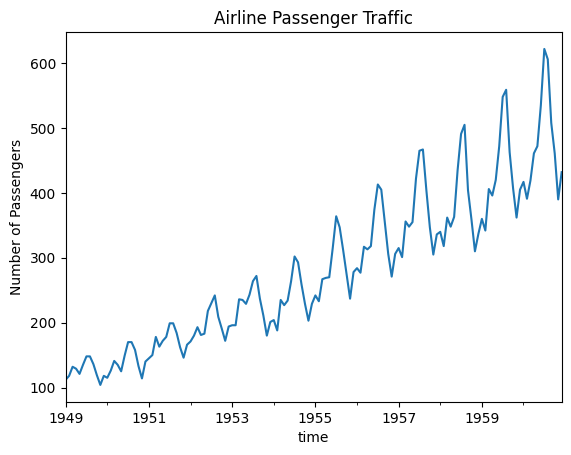

In [20]:
# EDA plot to visualise the data
passengers.plot(title = "Airline Passenger Traffic")
plt.ylabel('Number of Passengers')
plt.show()

In [21]:
# checking if the data is stationary
result = adfuller(passengers)
print(f'ADF Statistic: {result[0]}')
print(f'P-Value: {result[1]}')

ADF Statistic: 0.8153688792060498
P-Value: 0.991880243437641


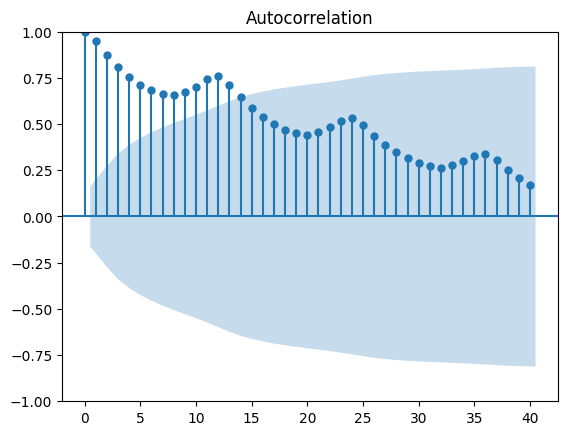

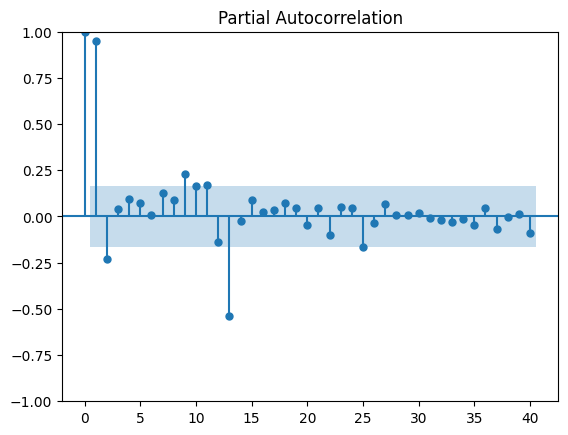

In [22]:
plot_acf (passengers, lags = 40)
plot_pacf(passengers, lags=40, method ='ywm')
plt.show()

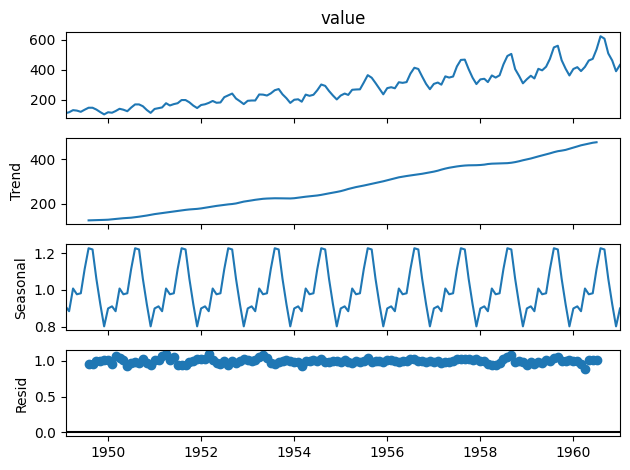

In [23]:
decompose_result = seasonal_decompose(passengers, model ='multiplicative')
decompose_result.plot()
plt.show()

## Model Building
Based on the insights from our EDA, we will developtime series forecasting models. We will explore models like ARIMA and SARIMA.


In [24]:
arima_model = ARIMA(passengers, order=(1,1,1))
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 02 May 2024   AIC                           1394.683
Time:                        08:50:11   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

In [25]:
sarima_model = SARIMAX(passengers, order=(1,1,1), seasonal_order = (1,1,1,12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02


 This problem is unconstrained.



At iterate    5    f=  3.52337D+00    |proj g|=  3.73531D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96158D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.97602D-03

At iterate   20    f=  3.51493D+00    |proj g|=  7.03168D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.242D-05   3.515D+00
  F =   3.5149263635006722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:               

## Prediction with SARIMA Model
Seasonal AutoRegressive Integrated Moving Average (SARIMA) model is particularly well-suited for datasets with seasonal trends. We apply the SARIMA model to the airline passenger data, which exhibits clear seasonal patterns.


In [26]:
sample_pred = sarima_result.get_prediction(start = passengers.index[0], end = passengers.index[-1])
sample_pred_ci = sample_pred.conf_int()


n_steps = 24
out_of_sample_forecast = sarima_result.get_forecast(steps = n_steps)
forecast_index = pd.date_range(start = passengers.index[-1], periods = n_steps+1, freq = 'M')[1:]
out_of_sample_forecast_ci = out_of_sample_forecast.conf_int()
out_of_sample_forecast.predicted_mean.index = forecast_index


### Forecasting
Using the fitted SARIMA model, we forecast future passenger numbers. We visualize these forecasts alongside historical data to assess the model's effectiveness in capturing seasonal peaks and troughs.

In [27]:
print("Forecasted Values;\n", out_of_sample_forecast.predicted_mean)
print("\n Confidence Intervals:\n", out_of_sample_forecast_ci)

Forecasted Values;
 1961-01-31    449.330116
1961-02-28    424.386203
1961-03-31    459.032551
1961-04-30    497.865017
1961-05-31    509.862913
1961-06-30    568.258495
1961-07-31    655.810698
1961-08-31    641.190810
1961-09-30    546.392616
1961-10-31    496.801185
1961-11-30    427.674504
1961-12-31    471.236107
1962-01-31    484.961081
1962-02-28    458.867894
1962-03-31    487.373445
1962-04-30    529.140068
1962-05-31    540.213074
1962-06-30    602.877787
1962-07-31    689.917998
1962-08-31    674.018481
1962-09-30    576.251601
1962-10-31    529.062922
1962-11-30    458.199316
1962-12-31    500.313015
Freq: ME, Name: predicted_mean, dtype: float64

 Confidence Intervals:
             lower value  upper value
1961-01-31   426.900839   471.759392
1961-02-28   397.539156   451.233250
1961-03-31   427.916570   490.148533
1961-04-30   463.054754   532.675279
1961-05-31   471.707997   548.017829
1961-06-30   527.030129   609.486860
1961-07-31   611.722529   699.898866
1961-08-31  

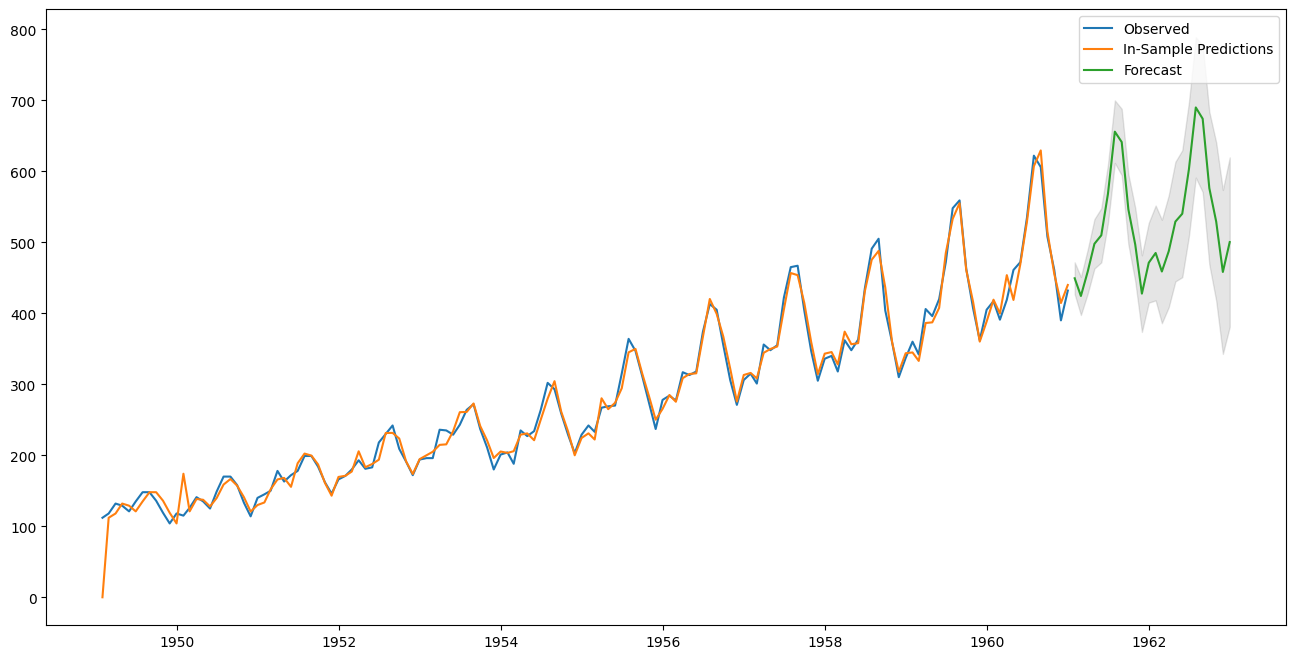

In [28]:
plt.figure(figsize=(16,8))
plt.plot(passengers, label='Observed')

plt.plot(sample_pred.predicted_mean, label="In-Sample Predictions")


plt.plot(out_of_sample_forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, out_of_sample_forecast_ci.iloc[:,0],
                 out_of_sample_forecast_ci.iloc[:,1,], color ='k', alpha = 0.1)


plt.legend()
plt.show()

In [29]:
# Using ARIMA

sample_pred1 = arima_result.get_prediction(start = passengers.index[0], end = passengers.index[-1])
sample_pred_ci1 = sample_pred.conf_int()


n_steps = 24
out_of_sample_forecast1 = arima_result.get_forecast(steps = n_steps)
forecast_index1 = pd.date_range(start = passengers.index[-1], periods = n_steps+1, freq = 'M')[1:]
out_of_sample_forecast_ci1 = out_of_sample_forecast1.conf_int()
out_of_sample_forecast1.predicted_mean.index = forecast_index1


## Prediction with ARIMA Model
The AutoRegressive Integrated Moving Average (ARIMA) model, while robust for non-seasonal data, is tested on our seasonal dataset for comparative analysis.


### Forecasting and Limitations
Post model fitting, we forecast the future passenger numbers using the ARIMA model. The forecasts are visualized and compared against the actual data to highlight the model’s limitations, particularly its inability to model the seasonal variations effectively as compared to the SARIMA model.


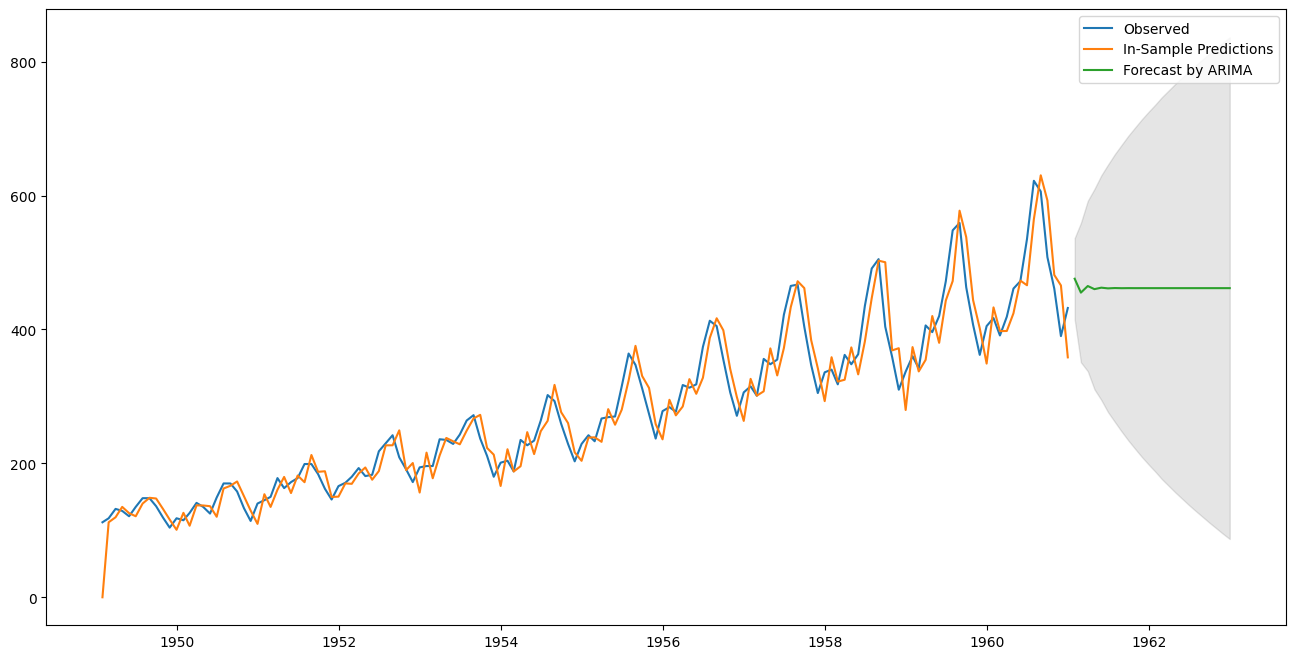

In [30]:
# Plotting the observations usning ARIMA model

plt.figure(figsize=(16,8))
plt.plot(passengers, label='Observed')

plt.plot(sample_pred1.predicted_mean, label="In-Sample Predictions")


plt.plot(out_of_sample_forecast1.predicted_mean, label='Forecast by ARIMA')
plt.fill_between(forecast_index1, out_of_sample_forecast_ci1.iloc[:,0],
                 out_of_sample_forecast_ci1.iloc[:,1,], color ='k', alpha = 0.1)

plt.legend()
plt.show()

## Comparative Analysis of SARIMA and ARIMA Models
This section provides a detailed comparison between the SARIMA and ARIMA models. We discuss how the inclusion of seasonal parameters in SARIMA helps in significantly improving the forecast accuracy by addressing the seasonality which ARIMA fails to capture.

### Visual Comparison
Through comparative plots, we have visually demonstrate the superiority of SARIMA in handling seasonal data. These plots clearly depict the difference in the ability of each model to forecast seasonal peaks.

### Insights and Conclusion
Our analysis confirms the importance of selecting a model that aligns with the data characteristics. SARIMA’s ability to incorporate seasonality makes it a preferable choice for this dataset.